In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from scipy.optimize import fmin_tnc
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score, root_mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
mpg = pd.read_csv('C:\\MGTU\\6 semestr\\TMO\\auto-mpg.csv')

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
mpg.shape

(398, 9)

In [6]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
mpg = mpg[mpg['horsepower'] != '?']
mpg['horsepower'] = mpg['horsepower'].astype(float)

In [8]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [10]:
mpg = mpg.drop(columns=['car name'])

<Axes: >

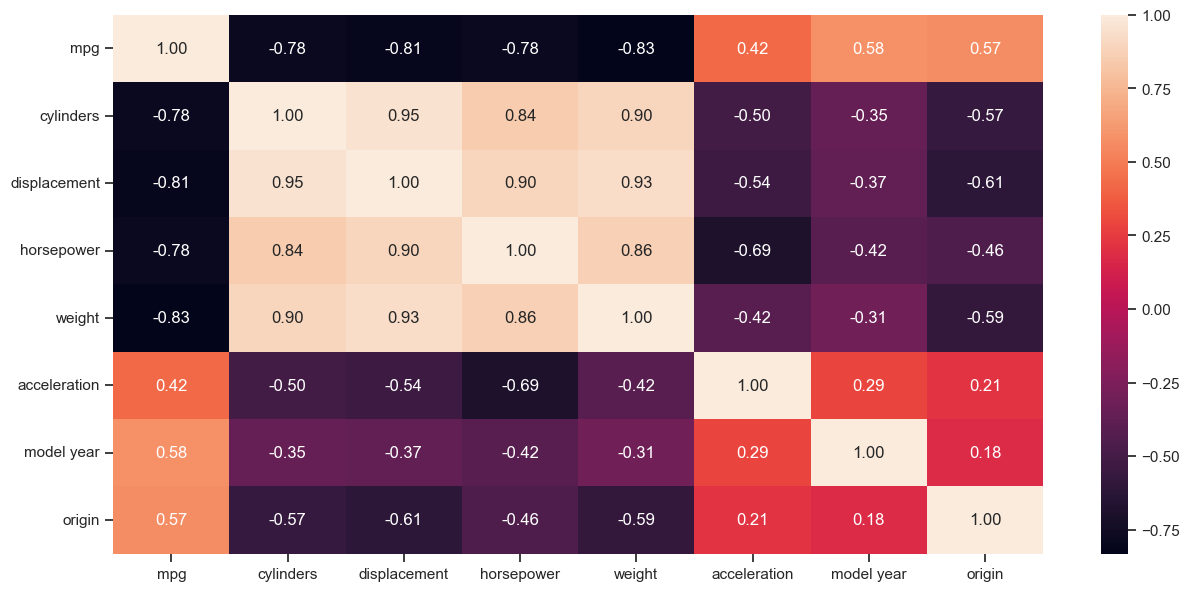

In [11]:
# Построение корреляционной матрицы
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(mpg.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

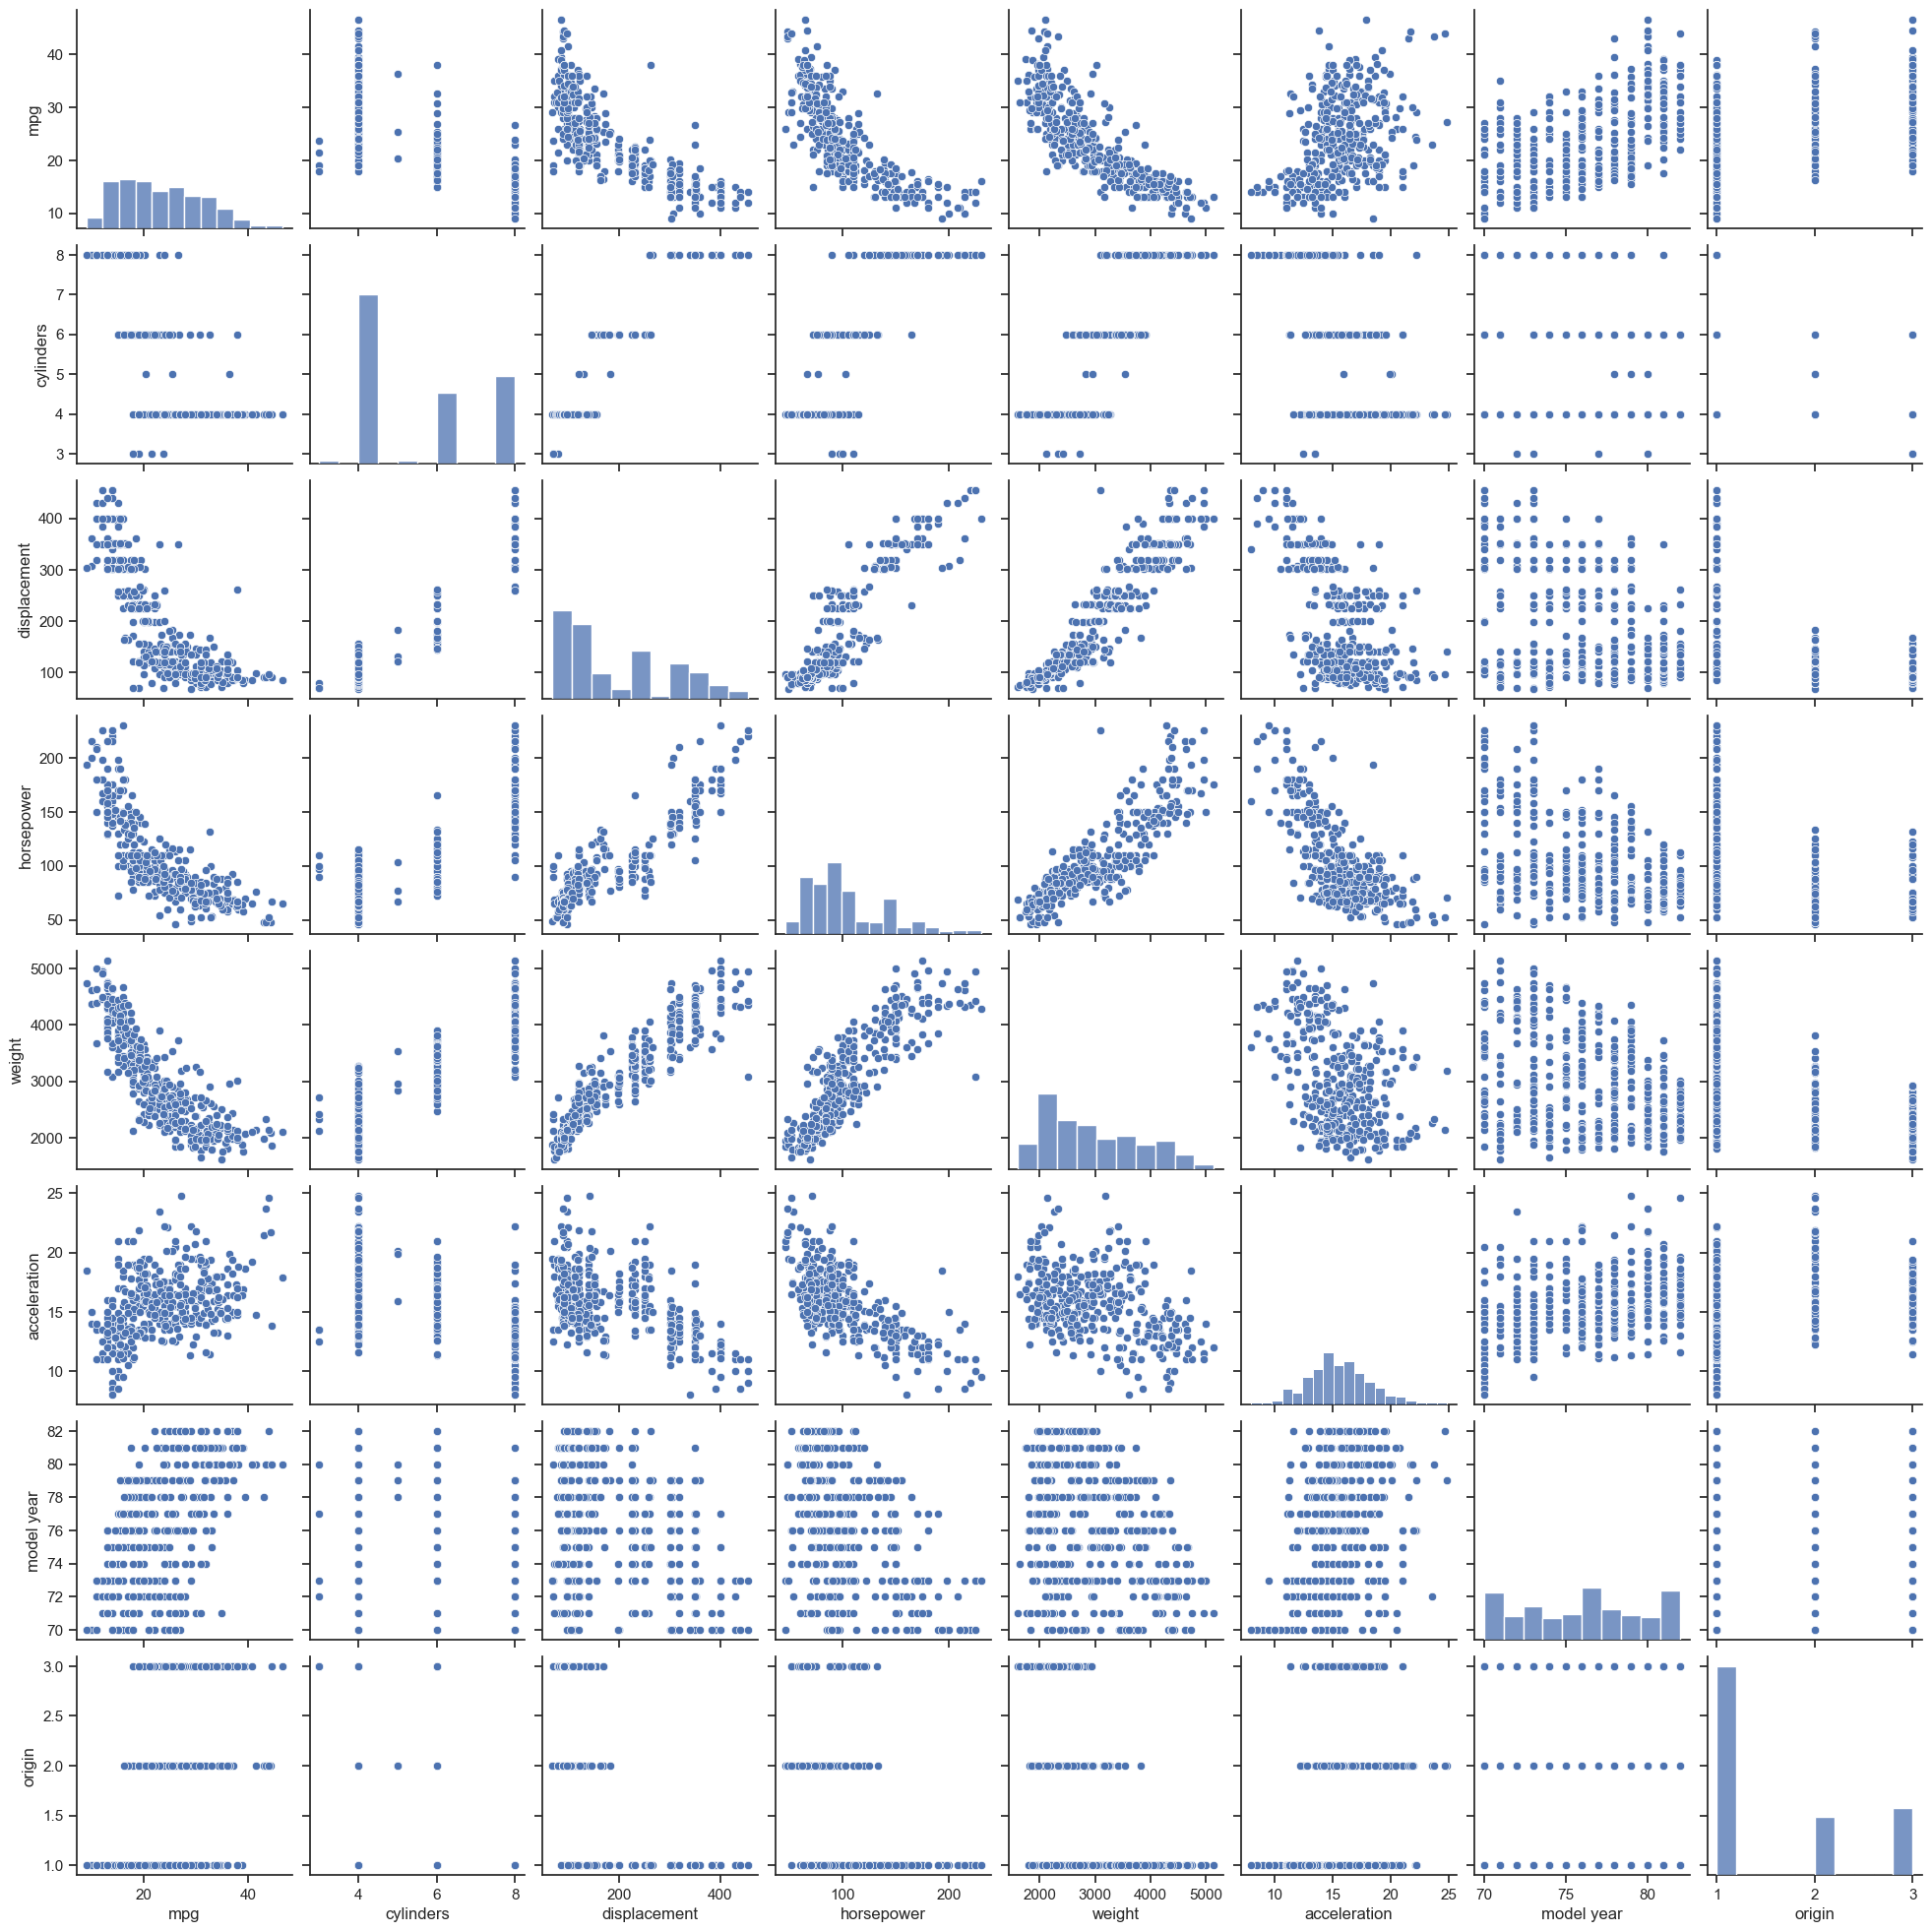

In [12]:
sns.pairplot(mpg)

In [13]:
X = mpg.drop(columns=['mpg'])  # Признаки
y = mpg['mpg']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
mpg_X_train, mpg_X_test, mpg_y_train, mpg_y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
reg = LinearRegression().fit(mpg_X_train, mpg_y_train)

In [15]:
r2_score(mpg_y_train, reg.predict(mpg_X_train))

0.8180487829836617

In [16]:
r2_score(mpg_y_test, reg.predict(mpg_X_test))

0.8266335797333633

In [17]:
mean_absolute_error(mpg_y_test, reg.predict(mpg_X_test))

2.5990189844591645

In [18]:
reg.coef_

array([-0.14528154,  0.01745309, -0.00667237, -0.0070697 ,  0.18951236,
        0.73877038,  1.37640208])

In [19]:
ridge = linear_model.Ridge().fit(mpg_X_train, mpg_y_train)

In [20]:
r2_score(mpg_y_train, ridge.predict(mpg_X_train))

0.8180478723499435

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # Задаем степень полинома
X_train_poly = poly.fit_transform(mpg_X_train)
X_test_poly = poly.transform(mpg_X_test)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, mpg_y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_poly)

In [22]:
r2_score(mpg_y_test, y_pred)

0.8580639971878854

In [23]:
mean_absolute_error(mpg_y_test, y_pred)

2.174549224909089

In [24]:
model.coef_

array([-4.67436941e-08,  4.31291051e+00, -5.18949013e-01, -3.30531452e-01,
        2.82122780e-02, -9.79503107e+00, -1.04696086e+01, -2.70011338e+01,
       -8.02695107e-01,  3.89476353e-02, -5.39505042e-03, -8.80589599e-04,
        2.69170373e-01, -6.05795997e-02,  8.86922677e-01, -4.44438506e-04,
        8.31456111e-04,  2.10058140e-05, -2.78178511e-04,  3.75894548e-03,
        2.27816750e-02,  3.34185357e-05, -5.50186562e-05,  1.68385470e-03,
        3.18324864e-03,  1.97753504e-02,  1.38782342e-06, -1.10177456e-04,
       -3.96611889e-04, -1.65467197e-03,  4.84198248e-02,  7.91450641e-02,
        5.76104838e-01,  6.62581479e-02,  1.93185358e-01, -1.70135239e-01])

In [25]:
ridgep = linear_model.Ridge().fit(X_train_poly, mpg_y_train)

C:\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.2937e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [26]:
r2_score(mpg_y_test, ridgep.predict(X_test_poly))

0.8691013907626597

In [27]:
mean_absolute_error(mpg_y_test, ridgep.predict(X_test_poly))

2.0462791651404157

In [28]:
X_polinomial = X.copy()

In [29]:
X_polinomial['displacement'] = X_polinomial['displacement']**0.5
X_polinomial['horsepower'] = X_polinomial['horsepower']**0.5
X_polinomial['weight'] = X_polinomial['weight']**0.5
# X_polinomial['acceleration'] = X_polinomial['acceleration']**2

In [30]:
mpg_X_train_p, mpg_X_test_p, mpg_y_train_p, mpg_y_test_p = train_test_split(X_polinomial , y, test_size=0.2, random_state=1)

In [31]:
reg_p = LinearRegression().fit(mpg_X_train_p, mpg_y_train_p)

In [32]:
r2_score(mpg_y_train_p, reg_p.predict(mpg_X_train_p))

0.8320797685210071

In [33]:
r2_score(mpg_y_test_p, reg_p.predict(mpg_X_test_p))

0.834803468131058

In [34]:
mean_absolute_error(mpg_y_test_p, reg_p.predict(mpg_X_test_p))

2.4542097908987466

In [101]:
reg_p.coef_

array([ 0.47374252,  0.01232144, -0.53462164, -0.66598948,  0.0348323 ,
        0.72504408,  1.06710951])

In [102]:
from sklearn.preprocessing import MinMaxScaler
sc0 = MinMaxScaler()
sc0_data = sc0.fit_transform(X)

In [103]:
mpg_X_train_0, mpg_X_test_0, mpg_y_train_0, mpg_y_test_0 = train_test_split(sc0_data , y, test_size=0.2, random_state=1)

In [104]:
reg0 = LinearRegression().fit(mpg_X_train_0, mpg_y_train_0)

In [105]:
r2_score(mpg_y_test_0, reg0.predict(mpg_X_test_0))

0.8266335797333633

# SVM

In [106]:
from sklearn.svm import SVR
mpg_X_train_1, mpg_X_test_1, mpg_y_train_1, mpg_y_test_1 = train_test_split(X , y, test_size=0.2, random_state=1)

In [107]:
svr_1 = SVR()
svr_1.fit(mpg_X_train_1, mpg_y_train_1)

SVR()

In [108]:
mpg_y_pred_1 = svr_1.predict(mpg_X_test_1)

In [109]:
r2_score(mpg_y_test_1, mpg_y_pred_1)

0.6723760369735721

In [110]:
mean_absolute_error(mpg_y_test_1, mpg_y_pred_1)

3.3219120724007896

In [111]:
X.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [125]:
y.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [112]:
from sklearn.preprocessing import MinMaxScaler
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(X)

In [113]:
mpg_X_train_2, mpg_X_test_2, mpg_y_train_2, mpg_y_test_2 = train_test_split(sc1_data , y, test_size=0.2, random_state=1)

In [114]:
sc1_data[:2]

array([[1.        , 0.61757106, 0.45652174, 0.5361497 , 0.23809524,
        0.        , 0.        ],
       [1.        , 0.72868217, 0.64673913, 0.58973632, 0.20833333,
        0.        , 0.        ]])

In [115]:
svr_2 = SVR()
svr_2.fit(mpg_X_train_2, mpg_y_train_2)

SVR()

In [116]:
mpg_y_pred_2 = svr_2.predict(mpg_X_test_2)

In [117]:
r2_score(mpg_y_test_2, mpg_y_pred_2)

0.8285144007639063

In [118]:
mean_absolute_error(mpg_y_test_2, mpg_y_pred_2)

2.282145913146911

# Деревья решений

In [119]:
from sklearn.tree import DecisionTreeRegressor
mpg_tree_regr = DecisionTreeRegressor(random_state=1).fit(mpg_X_train, mpg_y_train)
mpg_y_test_predict = mpg_tree_regr.predict(mpg_X_test)
r2_score(mpg_y_test, mpg_y_test_predict)

0.8355452168674431

In [120]:
mean_absolute_error(mpg_y_test, mpg_y_test_predict)

2.4721518987341775

In [121]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

### График важности признаков в дереве решений

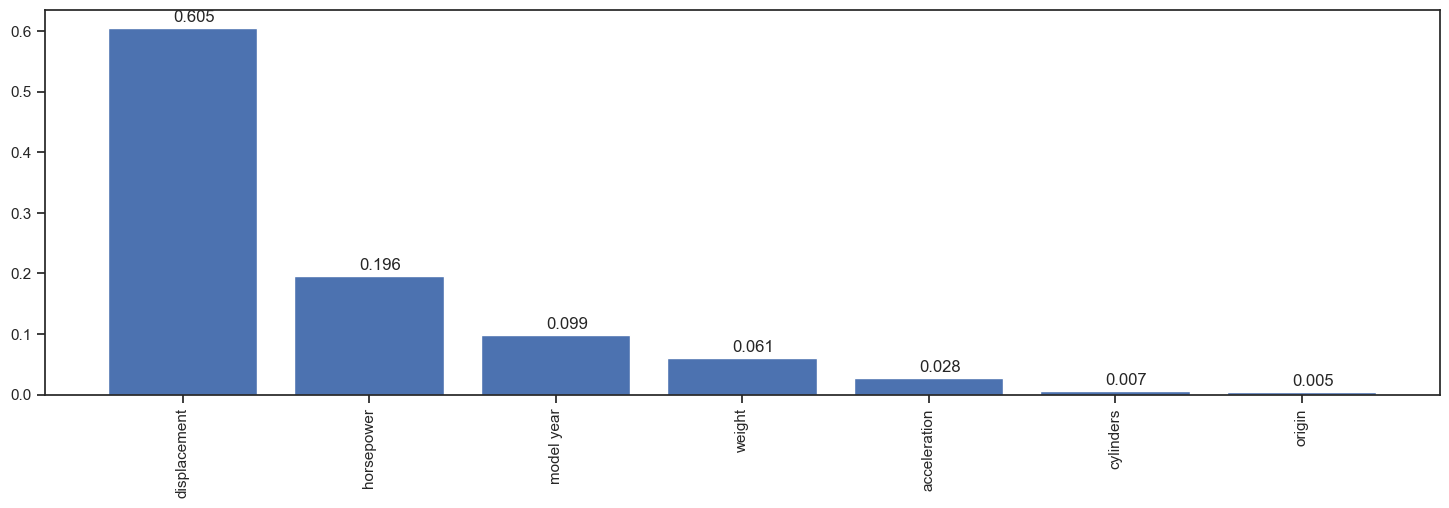

In [122]:
mpg_tree_regr_fl, mpg_tree_regr_fd = draw_feature_importances(mpg_tree_regr, X)

### Правила дерева решений в текстовом виде

In [123]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(mpg_tree_regr, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

### Визуализация дерева решений

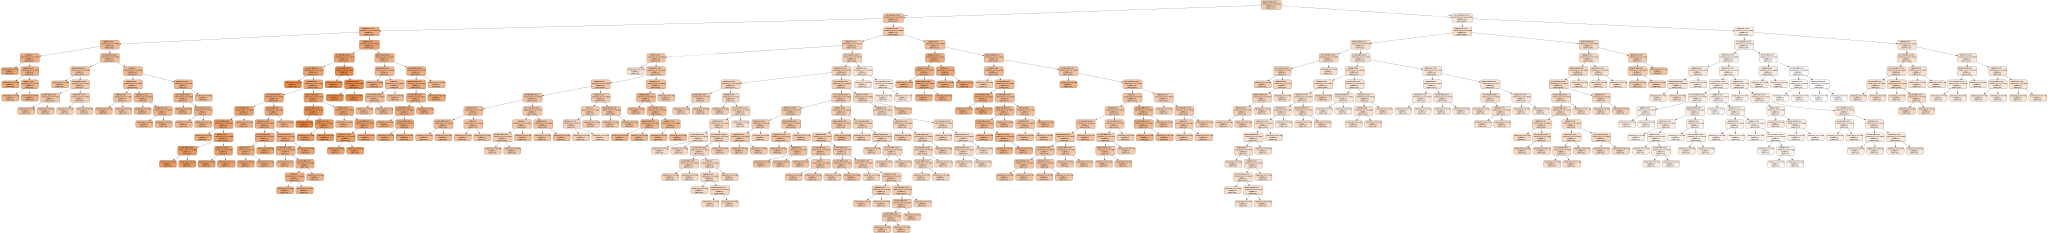

In [124]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(mpg_tree_regr, out_file=None, 
                           feature_names=X.columns, 
                           class_names=mpg['mpg'], 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [57]:
from sklearn.tree import DecisionTreeRegressor
mpg_tree_regr_d = DecisionTreeRegressor(random_state=1, max_depth=10).fit(mpg_X_train, mpg_y_train)
mpg_y_test_predict_d = mpg_tree_regr_d.predict(mpg_X_test)

In [58]:
r2_score(mpg_y_test, mpg_y_test_predict_d)

0.8458130246478665

In [59]:
root_mean_squared_error(mpg_y_test, mpg_y_test_predict_d)

3.2693412103045763

In [60]:
mpg_tree_regr_fl[0:4]

['displacement', 'horsepower', 'model year', 'weight']

In [61]:
sum(mpg_tree_regr_fd[0:4])

0.9603184500755281

In [62]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [63]:
X_sorted = X[mpg_tree_regr_fl]
X_sorted.head()

,displacement,horsepower,model year,weight,acceleration,cylinders,origin
0,307.0,130.0,70,3504,12.0,8,1
1,350.0,165.0,70,3693,11.5,8,1
2,318.0,150.0,70,3436,11.0,8,1
3,304.0,150.0,70,3433,12.0,8,1
4,302.0,140.0,70,3449,10.5,8,1


In [64]:
mpg_X_train_tr, mpg_X_test_tr, mpg_y_train_tr, mpg_y_test_tr = train_test_split(X_sorted , y, test_size=0.2, random_state=1)

In [65]:
# Обучим дерево и предскажем результаты на всех признаках 
mpg_tree_regr_feat_1 = DecisionTreeRegressor(random_state=1).fit(mpg_X_train_tr, mpg_y_train_tr)
mpg_y_test_predict = mpg_tree_regr_feat_1.predict(mpg_X_test_tr)

In [66]:
r2_score(mpg_y_test_tr, mpg_y_test_predict)

0.8357771185080485

In [67]:
mpg_tree_regr_feat_2 = DecisionTreeRegressor(random_state=1).fit(
    mpg_X_train_tr[mpg_tree_regr_fl[0:4]], mpg_y_train_tr)
mpg_y_test_predict_2 = mpg_tree_regr_feat_2.predict(mpg_X_test_tr[mpg_tree_regr_fl[0:4]])